<a href="https://colab.research.google.com/github/maggiecope/comp351-ai-project/blob/main/Comp351FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Polynomial regression on selected continuous features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data
file_path = "Wait_Times.csv"   # <--- THIS IS YOUR REAL FILE NOW
df = pd.read_csv(file_path)

# 2. Date/time conversions + feature engineering (minimal version)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Local Time"] = pd.to_datetime(df["Local Time"], errors="coerce")

df["hour"] = df["Local Time"].dt.hour
df["minute"] = df["Local Time"].dt.minute
df["time_in_minutes"] = df["hour"] * 60 + df["minute"]
df["day_of_week_num"] = df["Date"].dt.weekday
df["day_of_year"] = df["Date"].dt.dayofyear
df["month"] = df["Date"].dt.month

# 3. Choose continuous features for polynomial expansion
features_poly = [
    "time_in_minutes",
    "temp",
    "humidity",
    "precip",
    "day_of_week_num",
    "day_of_year",
    "month",
]

X = df[features_poly]
y = df["Wait Time"]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Polynomial expansion (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 6. Fit polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# 7. Predictions and metrics
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
train_r2_poly = r2_score(y_train, y_pred_train_poly)
test_r2_poly = r2_score(y_test, y_pred_test_poly)

(train_rmse_poly, test_rmse_poly, train_r2_poly, test_r2_poly)


(np.float64(23.867865106321094),
 np.float64(23.707119616760068),
 0.05975222542193326,
 0.06083877773731261)

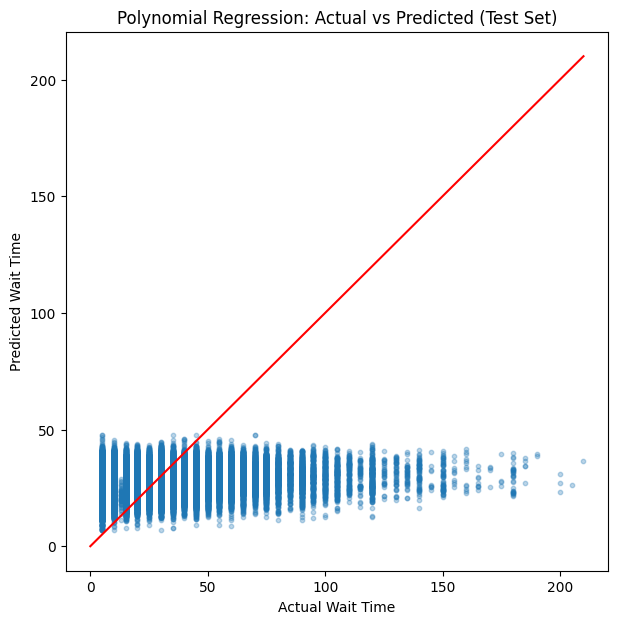

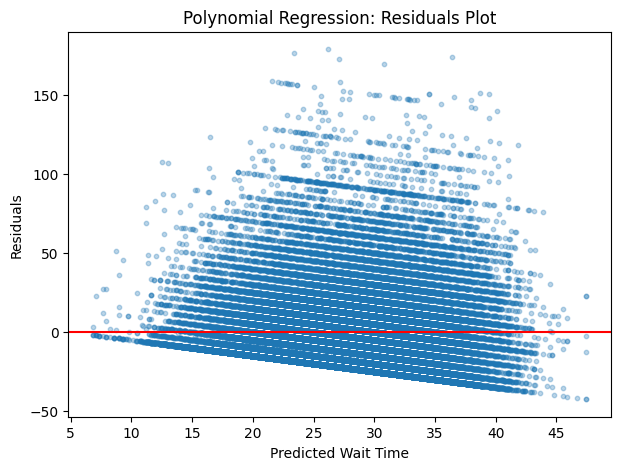

In [6]:
#Visual evaluation of polynomial regression!!

import matplotlib.pyplot as plt

# 1. Actual vs Predicted (Test Set)
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_poly, alpha=0.3, s=10)
plt.xlabel("Actual Wait Time")
plt.ylabel("Predicted Wait Time")
plt.title("Polynomial Regression: Actual vs Predicted (Test Set)")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red")
plt.show()

# 2. Residuals Plot
residuals_poly = y_test - y_pred_test_poly

plt.figure(figsize=(7,5))
plt.scatter(y_pred_test_poly, residuals_poly, alpha=0.3, s=10)
plt.axhline(0, color="red")
plt.xlabel("Predicted Wait Time")
plt.ylabel("Residuals")
plt.title("Polynomial Regression: Residuals Plot")
plt.show()
